In [22]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Import needed libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [24]:
# connect directoy and data file
directory = "/content/drive/MyDrive/Travel tide project"

user_pca = pd.read_csv(f'{directory}/user_pca.csv', index_col=0)
user_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19
user_id,,,,,,,,,,,,,,,,,,,,
23557,-3.429441,-3.418231,-3.320134,0.468178,1.377395,2.265260,-0.576054,-0.897320,-0.380868,-0.360521,0.048232,0.514445,-1.514066,-0.201236,0.720454,-0.712344,0.089671,0.067348,-0.781497,0.938860
94883,-0.957907,1.266193,0.177107,1.480327,-2.069751,0.761936,-0.691564,-0.879786,-0.376304,-0.984331,-1.324357,-0.102675,-0.748436,0.240704,-0.458222,-0.051591,0.052344,0.239440,0.278264,0.085638
101486,-2.241619,-0.746612,-0.757221,0.961468,-0.519950,1.698168,-0.962612,-0.885771,-0.289243,0.652978,1.541911,1.027198,0.777682,0.804140,-0.221259,-1.825600,-0.092917,-0.055318,-0.015926,-0.027606
101961,3.661233,-1.914617,-1.194891,-0.836790,-0.349228,0.569078,-0.935795,-0.587189,0.107719,-0.446717,-0.728123,0.234118,-0.036748,0.951645,-0.787592,0.482645,0.280748,-0.029368,1.246243,-0.360206
118043,5.308640,1.690194,-0.403939,2.245428,0.573825,0.301102,-1.455153,-0.288848,1.249576,0.753263,0.754925,0.795186,0.472412,-1.613456,3.353861,-1.056898,0.253018,-0.759766,-1.231233,-1.022157


In [25]:
user_pca.shape

(5442, 20)

In [26]:
print(user_pca.columns)

Index(['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7',
       'pca_8', 'pca_9', 'pca_10', 'pca_11', 'pca_12', 'pca_13', 'pca_14',
       'pca_15', 'pca_16', 'pca_17', 'pca_18', 'pca_19'],
      dtype='object')


# Define the range for the number of clusters to be tested (e.g., 2 to 10)

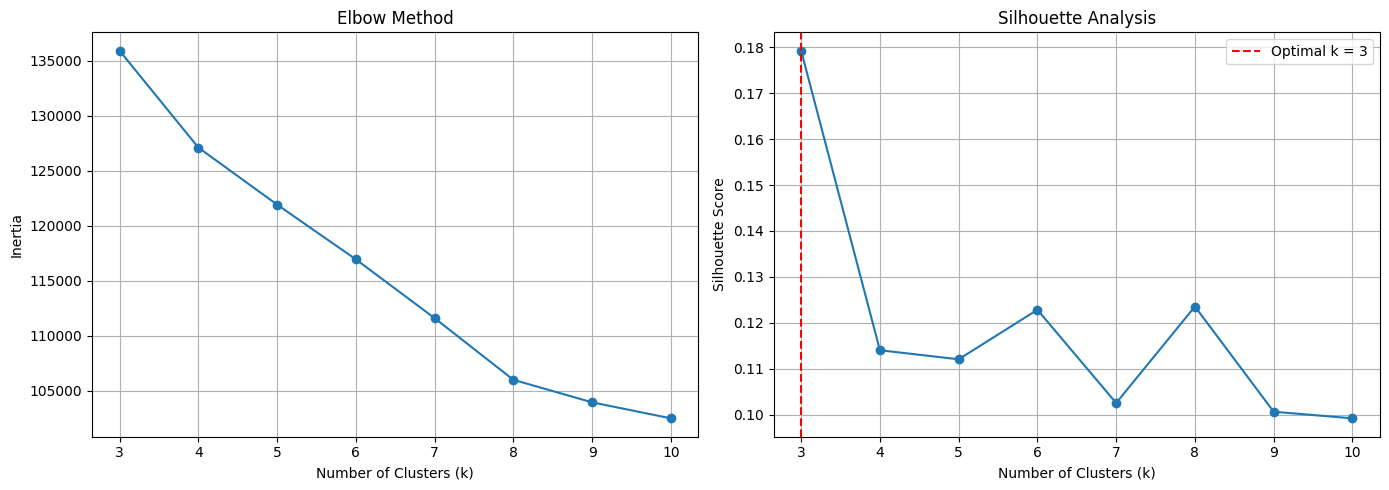

Optimal number of clusters based on Silhouette: 3


In [27]:
# Define the range for the number of clusters to be tested (e.g., 2 to 10)
range_n_clusters = range(3, 11)
silhouette_scores = []
inertia_values = []

# Perform K-means for each k-value and calculate the silhouette score.
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(user_pca)
    silhouette_avg = silhouette_score(user_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    inertia_values.append(kmeans.inertia_)

# Find best silhouette k
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 5))

#  Create Elbow Plot
ax1.plot(range_n_clusters, inertia_values, marker='o')
ax1.set_title("Elbow Method")
ax1.set_xlabel("Number of Clusters (k)")
ax1.set_ylabel("Inertia")
ax1.grid(True)

# --- Silhouette Plot ---
ax2.plot(range_n_clusters, silhouette_scores, marker='o')
ax2.axvline(optimal_n_clusters, color='red', linestyle='--', label=f'Optimal k = {optimal_n_clusters}')
ax2.set_title("Silhouette Analysis")
ax2.set_xlabel("Number of Clusters (k)")
ax2.set_ylabel("Silhouette Score")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"Optimal number of clusters based on Silhouette: {optimal_n_clusters}")

In [28]:
#Usually we choose value of K (number of clusters) then we evaluate this number of with Silhouette
#Analysis  and the K that gives the highes silhouette score issnually considere the best k but in our
#case however number cluster for silhouette analysis is 3, because we have five perks and also
#with Elbow method suggest 5-6 clusters so optional n =5
optimal_n_clusters = 5

# K-mean clustering with five clusters

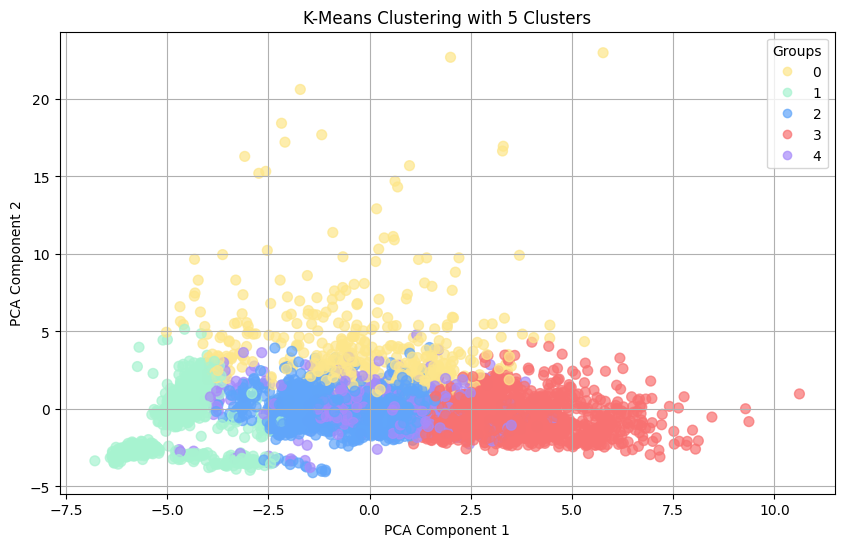

In [29]:
from matplotlib.colors import ListedColormap

# Custom colors for clusters
custom_colors = [
    "#FDE68A",  # light yellow (group 0)
    "#A7F3D0",  # light green  (group 1)
    "#60A5FA",  # blue
    "#F87171",  # red
    "#A78BFA"   # purple
]

cmap = ListedColormap(custom_colors)

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
user_pca['group'] = kmeans.fit_predict(user_pca)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    user_pca.iloc[:, 0],
    user_pca.iloc[:, 1],
    c=user_pca['group'],
    cmap=cmap,
    s=50,
    alpha=0.7
)

plt.title(f'K-Means Clustering with {optimal_n_clusters} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)

# Add legend
legend = plt.legend(*scatter.legend_elements(), title="Groups")
plt.show()


In [30]:
cluster_profiles = user_pca.groupby('group').mean()
display(cluster_profiles.round(2))

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19
group,,,,,,,,,,,,,,,,,,,,
0,-0.23,4.04,-0.75,1.57,0.20,-0.20,0.07,-0.02,0.04,-0.08,-0.01,-0.05,-0.13,0.12,0.02,-0.18,0.17,0.08,-0.09,0.07
1,-4.77,-0.82,-0.23,0.00,0.15,-0.08,-0.43,0.11,-0.09,0.04,-0.05,-0.15,-0.07,0.00,0.01,-0.08,0.06,-0.28,0.16,0.14
2,-0.60,-0.09,-0.27,-0.32,-0.30,0.07,0.32,-0.12,0.04,-0.01,0.04,0.09,0.07,-0.04,0.01,0.10,-0.10,0.16,-0.09,-0.11
3,3.34,-0.58,-0.36,-0.17,0.02,-0.05,-0.22,0.09,-0.04,0.03,-0.01,-0.04,-0.00,0.00,-0.05,-0.04,0.06,-0.19,0.14,0.02
4,0.33,-0.02,3.16,0.38,0.69,0.20,0.11,-0.01,0.09,-0.06,-0.04,0.06,0.00,0.04,0.07,0.02,-0.04,0.37,-0.25,0.07


This K-means clustering plot shows that most of the separation between the five clusters occurs along PCA Component 1, indicating that the primary dimension driving segmentation is captured on the horizontal axis. One cluster (red) is clearly separated on the right with high PC1 values, suggesting a distinct group with strong underlying behavioral characteristics relative to others. On the left side, another cluster (green) occupies low PC1 values, forming a contrasting group. The remaining clusters (blue, purple, yellow) are more concentrated around the center and partially overlap, implying they share some similarities but still differ in subtler ways captured by the combination of PCA Component 1 and 2.

The key takeaway is that the data contains one or two strongly distinct traveler segments, plus several moderately differentiated groups clustered around average behavior. PCA Component 2 mainly adds vertical spread but does not create strong horizontal separations, meaning it refines distinctions rather than defining primary segments. Overall, the clustering appears reasonable: there is meaningful structure, but not extreme separation, which is typical for real behavioral data. These clusters can now be interpreted by examining feature averages per cluster to assign practical labels such as high-activity travelers, low-engagement users, deal-seekers, or group-oriented travelers

In [31]:
#save the user_id -> group connection in a csv

user_pca['group'].to_csv(f'{directory}/user_segment.csv')
user_pca['group']

,group
user_id,
23557,1
94883,2
101486,2
101961,3
118043,3
...,...
785186,2
792549,2
796032,2


In [32]:
# count of users per cluster
clusters = KMeans(n_clusters=optimal_n_clusters, random_state=42)\
            .fit_predict(user_pca.select_dtypes(include=["int64","float64"]))

output_df = user_pca.assign(cluster=clusters).reset_index()
output_df.to_csv("user_base_with_clusters.csv", index=False)

print("Clustering completed.")
print(output_df.cluster.value_counts())


Clustering completed.
cluster
2    2001
3    1587
1     875
4     524
0     455
Name: count, dtype: int64


In [33]:
# file downloaded
from google.colab import files

# Define the full path to the file
file_path = f'{directory}/user_segment.csv'

# Download the file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>